In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

godot_sb3_00 = pd.read_csv("./logs/sb3/Air_00_steps_32_batch_64_parallel_8_agents_16_1.csv")
godot_sb3_01 = pd.read_csv("./logs/sb3/Air_01_steps_32_batch_64_parallel_8_agents_16_1.csv")


In [2]:
godot_sb3_00.head()

,Wall time,Step,Value
0,1.690118e+09,4096,0.135815
1,1.690118e+09,8192,1.895357
2,1.690118e+09,12288,3.139557
3,1.690118e+09,16384,3.067014
4,1.690118e+09,20480,3.984873


In [3]:
godot_sb3_01.head()

,Wall time,Step,Value
0,1.690119e+09,4096,0.787722
1,1.690119e+09,8192,1.746233
2,1.690119e+09,12288,3.825282
3,1.690119e+09,16384,5.941506
4,1.690119e+09,20480,7.087479


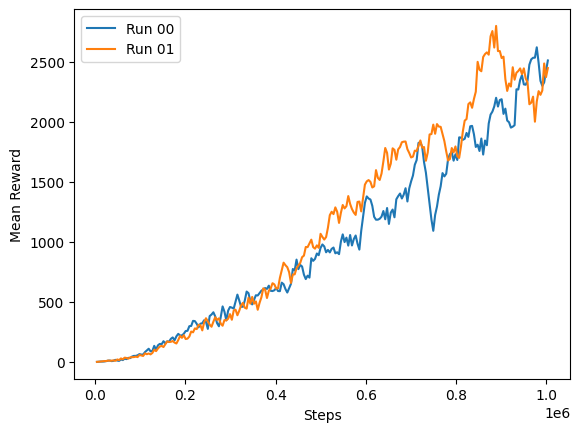

In [4]:
plt.plot(godot_sb3_00.Step, godot_sb3_00.Value, label="Run 00")
plt.plot(godot_sb3_01.Step, godot_sb3_01.Value, label="Run 01")
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")
plt.show()

In [11]:
# List of CSV file names
file_names = ['./logs/sb3/Air_00_steps_32_batch_64_parallel_8_agents_16_1.csv', './logs/sb3/Air_01_steps_32_batch_64_parallel_8_agents_16_1.csv']

# Load each CSV file into a DataFrame and store them in a list
data_frames = [pd.read_csv(file) for file in file_names]
data_frames

[        Wall time     Step        Value
 0    1.690118e+09     4096     0.135815
 1    1.690118e+09     8192     1.895357
 2    1.690118e+09    12288     3.139557
 3    1.690118e+09    16384     3.067014
 4    1.690118e+09    20480     3.984873
 ..            ...      ...          ...
 240  1.690119e+09   987136  2341.567139
 241  1.690119e+09   991232  2300.120850
 242  1.690119e+09   995328  2328.704346
 243  1.690119e+09   999424  2424.959717
 244  1.690119e+09  1003520  2511.518066
 
 [245 rows x 3 columns],
         Wall time     Step        Value
 0    1.690119e+09     4096     0.787722
 1    1.690119e+09     8192     1.746233
 2    1.690119e+09    12288     3.825282
 3    1.690119e+09    16384     5.941506
 4    1.690119e+09    20480     7.087479
 ..            ...      ...          ...
 240  1.690120e+09   987136  2225.216553
 241  1.690120e+09   991232  2261.342529
 242  1.690120e+09   995328  2486.465820
 243  1.690120e+09   999424  2372.909424
 244  1.690120e+09  1003520  2

In [12]:
mean_values = pd.concat(data_frames).groupby(level=0).mean()
mean_values

,Wall time,Step,Value
0,1.690119e+09,4096.0,0.461769
1,1.690119e+09,8192.0,1.820795
2,1.690119e+09,12288.0,3.482419
3,1.690119e+09,16384.0,4.504260
4,1.690119e+09,20480.0,5.536176
...,...,...,...
240,1.690119e+09,987136.0,2283.391846
241,1.690119e+09,991232.0,2280.731689
242,1.690119e+09,995328.0,2407.585083
243,1.690119e+09,999424.0,2398.934570


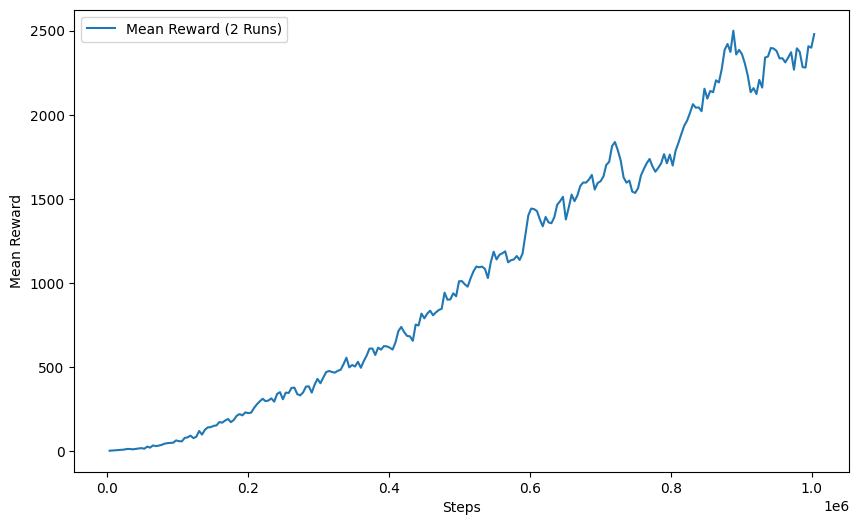

In [19]:
plt.figure(figsize=(10, 6))

# Plot the mean values
plt.plot(mean_values.Step, mean_values.Value, label='Mean Reward (2 Runs)')

# Add labels and title
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")

# Show the plot
plt.show()

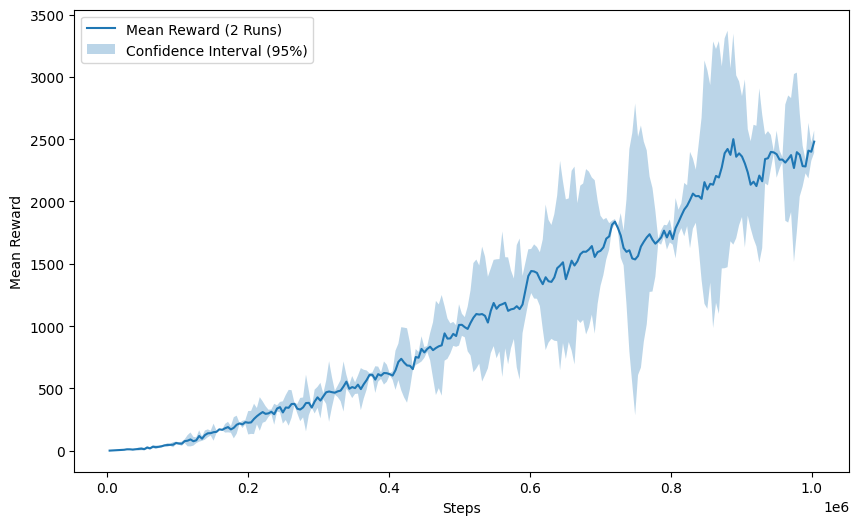

In [22]:

# Calculate the upper and lower bounds for the confidence interval
confidence_level = 0.95
std_values = pd.concat(data_frames).groupby(level=0).std()
lower_bound = mean_values - 2 * std_values
upper_bound = mean_values + 2 * std_values

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the mean values with confidence intervals
plt.plot(mean_values.Step, mean_values.Value, label='Mean Reward (2 Runs)')
plt.fill_between(mean_values.Step, lower_bound['Value'], upper_bound['Value'], alpha=0.3, label='Confidence Interval (95%)')

# Add labels and title
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")

# Show the plot
plt.show()


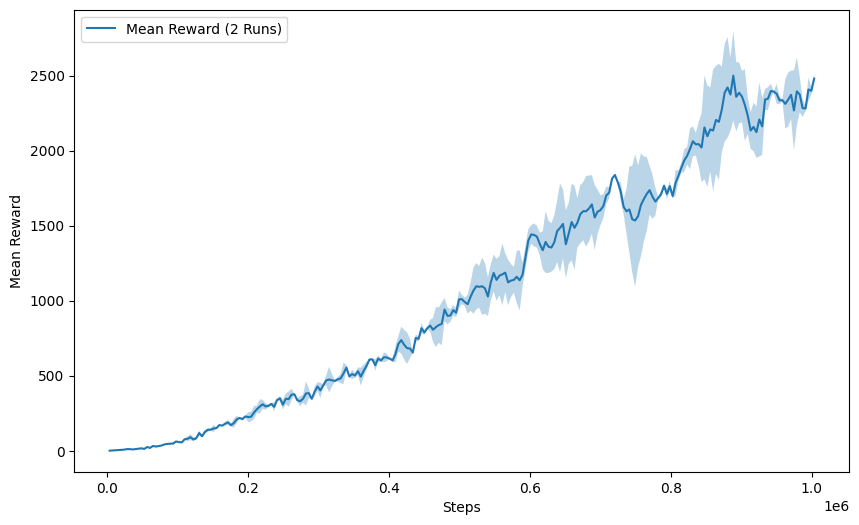

In [23]:
lower_bound = pd.concat(data_frames).groupby(level=0).min()
upper_bound = pd.concat(data_frames).groupby(level=0).max()

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the mean values with confidence intervals
plt.plot(mean_values.Step, mean_values.Value, label='Mean Reward (2 Runs)')
plt.fill_between(mean_values.Step, lower_bound['Value'], upper_bound['Value'], alpha=0.3)

# Add labels and title
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(loc="upper left")

# Show the plot
plt.show()
